In [40]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
import matplotlib.pyplot as plt

# Exercise 1

In [41]:
(x_data, _), (_, _) = cifar10.load_data()

In [42]:
x_data = x_data.reshape((len(x_data), 32, 32, 3))
x_train, x_temp, _, _ = train_test_split(x_data, x_data, test_size=0.2, random_state=42)
x_val, x_test, _, _ = train_test_split(x_temp, x_temp, test_size=0.5, random_state=42)

x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [43]:
input_img = Input(shape=(32, 32, 3))

x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(12, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# At this point, the representation is (8, 8, 32)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(12, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [44]:
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/10
313/313 [==============================] - 22s 66ms/step - loss: 0.5944 - val_loss: 0.5694
Epoch 2/10
313/313 [==============================] - 20s 65ms/step - loss: 0.5694 - val_loss: 0.5655
Epoch 3/10
313/313 [==============================] - 20s 64ms/step - loss: 0.5668 - val_loss: 0.5634
Epoch 4/10
313/313 [==============================] - 20s 65ms/step - loss: 0.5655 - val_loss: 0.5624
Epoch 5/10
313/313 [==============================] - 20s 65ms/step - loss: 0.5646 - val_loss: 0.5623
Epoch 6/10
313/313 [==============================] - 20s 65ms/step - loss: 0.5640 - val_loss: 0.5611
Epoch 7/10
313/313 [==============================] - 20s 65ms/step - loss: 0.5635 - val_loss: 0.5610
Epoch 8/10
313/313 [==============================] - 21s 67ms/step - loss: 0.5631 - val_loss: 0.5603
Epoch 9/10
313/313 [==============================] - 20s 65ms/step - loss: 0.5627 - val_loss: 0.5599
Epoch 10/10
313/313 [==============================] - 21s 66ms/step - loss: 0.562

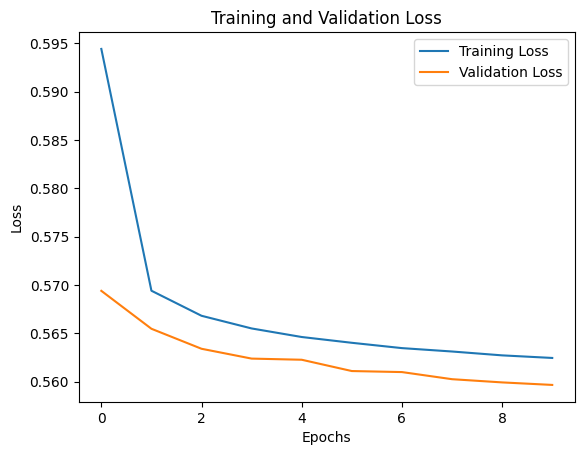

In [45]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

157/157 [==============================] - 1s 6ms/step


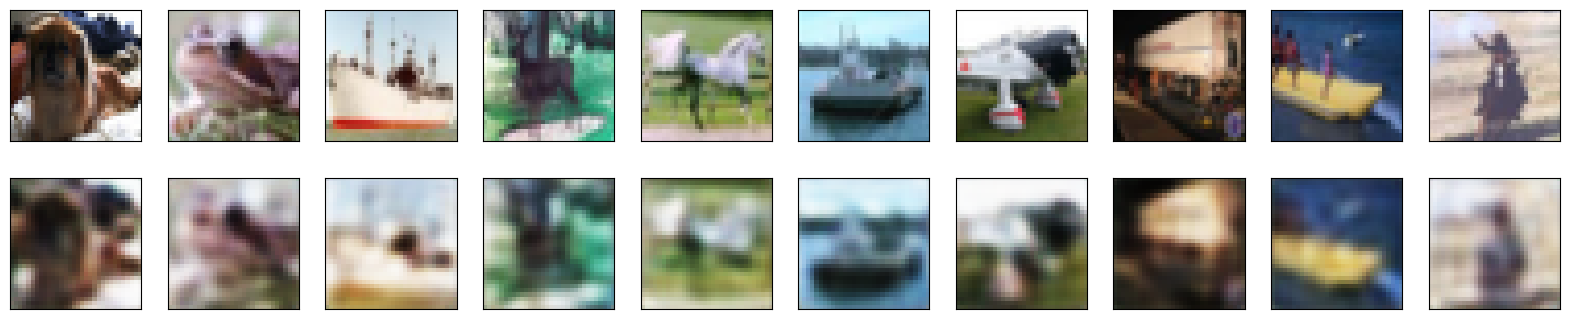

In [46]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Exercise 2